In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5f24b98bfe168b6c0cee304a169cc4172710bff4b5933b42ed0958bf0f9b9ae1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import nltk
from nltk.corpus import wordnet, gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [6]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [7]:
#Text and Number manipulation
import re
import string
from string import punctuation
from num2words import num2words

In [9]:
lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))
wordnet_map = {
    'N': wordnet.NOUN,
    'V': wordnet.VERB,
    'J': wordnet.ADJ,
    'R': wordnet.ADV
}


In [10]:
train = pd.read_csv('/content/gdrive/MyDrive/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/test.csv')

In [11]:
#Combine columns except Survived
column_list = ['PassengerId', 'Pclass', 'Name', 'Sex', "Age", 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin' ]
train['concatenated'] = train[column_list].astype(str).agg(' '.join, axis =1)
test['concatenated'] = train[column_list].astype(str).agg(' '.join, axis =1)

In [12]:
def to_number(text):
    # Define a regular expression pattern to capture the letter and number separately
    pattern = r"(?P<letter>[A-Za-z]*)(?P<number>\d+)"

    # Define a function to convert the matched number to words
    def replace(match):
        # Extract the letter and number from the match
        letter = match.group('letter')
        number = int(match.group('number'))

        # Convert the number to words
        words = num2words(number)

        # Return the original letter with the number in words
        return f"{letter} {words}" if letter else words

    # Use regular expression substitution to replace the number with words
    return re.sub(pattern, replace, text)

This function is able to avoid converting C85 to Ceighty five




In [13]:
def clean_html(text):
    Cleaner = re.compile('<.*?:') #
    text = re.sub(Cleaner, ' ', text)
    text = re.sub(r'[^a-zA-Z\s]',' ', text, flags=re.I)
    return text

The pattern <.?: will match any substring that starts with "<" and ends with ":". The .? part ensures that the pattern matches the shortest possible substring between "<" and ":".
re.sub() function is being used to replace substrings in the text variable that match the pattern specified by CLEANR with a space ' '.
re.sub(r'[^a-zA-Z\s]',' ', text, flags=re.I) removes any characters from the text string that are not alphabetic characters (both uppercase and lowercase) or whitespace characters.
flags=re.I stands for re.IGNORECASE

In [14]:
def remove_stopwords(text):
    return [word for word in word_tokenize(text) if not word in stopwords]

In [15]:
def rem_lines(text):
    return text.strip().replace('\n',' ')

In [16]:
def strip_punctuation(text):
    return ''.join(c for c in text if not c in punctuation)+ ' '

In [17]:
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    pos_tagged_text = nltk.pos_tag(text.split())
    return ' '.join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

If a POS tag is not provided, the default POS tag used is wordnet.NOUN.

In [18]:
train['concatenated'] = train['concatenated'].astype('str').apply(to_number)
train['concatenated'] = train['concatenated'].astype('str').apply(clean_html)
train['concatenated'] = train['concatenated'].astype('str').apply(remove_stopwords)
train['concatenated'] = train['concatenated'].astype('str').apply(strip_punctuation)
train['concatenated'] = train['concatenated'].astype('str').apply(lemmatize_words)


test['concatenated'] = test['concatenated'].astype('str').apply(to_number)
test['concatenated'] = test['concatenated'].astype('str').apply(clean_html)
test['concatenated'] = test['concatenated'].astype('str').apply(remove_stopwords)
test['concatenated'] = test['concatenated'].astype('str').apply(strip_punctuation)
test['concatenated'] = test['concatenated'].astype('str').apply(lemmatize_words)

<Axes: xlabel='Word'>

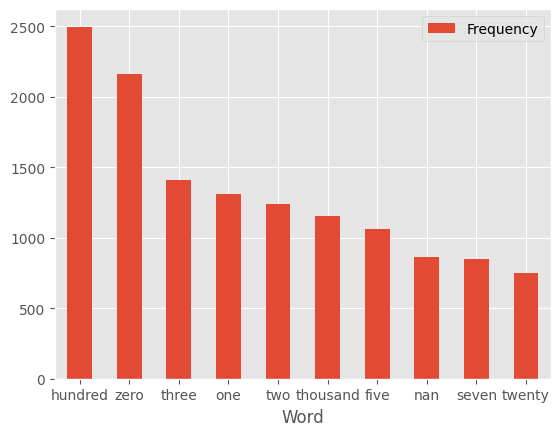

In [19]:
txt = train.concatenated.str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt) #tokenizes the concatenated text string into individual words
word_dist = nltk.FreqDist(words)#creates a frequency distribution of words
rslt = pd.DataFrame(word_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(train['concatenated'],train['Survived'], test_size=.30, random_state=88)

#Bag of words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score as CVScore
cv = CountVectorizer(binary=True,ngram_range=(1,2),min_df=0.0, max_df=1.0)
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

# TF-IDF Grouping

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
tv = TFIDF(use_idf=True, min_df=0.0, max_df=1.0)
tv_train = tv.fit_transform(X_train)
tv_test = tv.transform(X_test)

# Models

I am using professor's code to train and predict. The structure of the code is neat and clean.

In [23]:
from sklearn.metrics import classification_report as CR
from sklearn.naive_bayes import BernoulliNB as NB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC as SVM
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import Perceptron as P

nb=NB(alpha=.1)
lr=LR(penalty='l2', max_iter=500, C=1, random_state=42)
svm=SVM(penalty='l2', max_iter=50, C=1, random_state=42)
sgd=SGD(loss='hinge', penalty="l2", max_iter=500, random_state=42)
rfc=RFC(n_estimators=50, random_state=42)
gbc=GBC(n_estimators=50, random_state=42)
p=P(tol=1e-3, random_state=0)

models=[nb, lr,svm, sgd, rfc, gbc, p]

def fit(x1,y1,x2,y2):
    for model in models:
        model.fit(x1,y1)
        print(model)
        mypred=model.predict(x2)
        print(CR(mypred, y2))


fit(cv_train,y_train, cv_test, y_test)# try on bag of words grouping data

BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       176
           1       0.70      0.71      0.70        92

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.80      0.79      0.80       268

LogisticRegression(C=1, max_iter=500, random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       176
           1       0.68      0.68      0.68        92

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

LinearSVC(C=1, max_iter=50, random_state=42)
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       177
           1       0.67      0.68      0.67        91

    accuracy                           0.78       268
   ma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomForestClassifier(n_estimators=50, random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       186
           1       0.66      0.74      0.70        82

    accuracy                           0.80       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.81      0.80      0.81       268

GradientBoostingClassifier(n_estimators=50, random_state=42)
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       177
           1       0.69      0.70      0.70        91

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Perceptron()
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       181
           1       0.62      0.67      0.64        87

    accuracy                           0.76       2

In [24]:
fit(tv_train,y_train, tv_test, y_test)#try on TF-IDF grouping data

BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       181
           1       0.63      0.68      0.66        87

    accuracy                           0.77       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.77      0.77      0.77       268

LogisticRegression(C=1, max_iter=500, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       190
           1       0.62      0.74      0.68        78

    accuracy                           0.79       268
   macro avg       0.75      0.78      0.76       268
weighted avg       0.81      0.79      0.80       268

LinearSVC(C=1, max_iter=50, random_state=42)
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       181
           1       0.67      0.71      0.69        87

    accuracy                           0.79       268
   ma

# RNN
I give a try using rnn to train and predict the concatenated data.

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input,  Bidirectional

In [47]:
mybatch=64   #set batch size
embedding_size=512 #set out size for embedding
num_epochs=4 #set the number of epochs..
num_words = 50000     #number of words to tokenize, 50000 was start
tf.random.set_seed(1234) #set random number seed for tensorflow, python, etc.

In [48]:
oov_token = '<UNK>'   #out of vocabulary replacement
pad_type = 'post'     #padding type
trunc_type = 'post'   #truncation type

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

tokenizer.fit_on_texts(X_train.astype('str'))
#tokenizer.fit_on_texts(x_train2.astype('str'))

# Encode training data sentences into sequences
train_sequences1 = tokenizer.texts_to_sequences(X_train.astype('str'))

# Get max training sequence length
maxlen1 = max([len(x) for x in train_sequences1])

# Pad the training sequences to the maximum sentence length
x_train1 = pad_sequences(train_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen1)

In [49]:
# Encode test data sentences into sequences
test_sequences1 = tokenizer.texts_to_sequences(X_test.astype('str'))

# Pad the training sequences to the maximum sentence length of training set
x_test1 = pad_sequences(test_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen1)

In [50]:
#RNN
input_1 = Input(shape=(x_train1.shape[1]))
v=Embedding(len(tokenizer.word_index) + 1, embedding_size)(input_1)
v=Bidirectional(LSTM(embedding_size, return_sequences=True, dropout=.5))(v)
v=Bidirectional(LSTM(embedding_size, return_sequences=False, dropout=.2))(v)
output=Dense(1, activation='sigmoid')(v)
model=Model(inputs=[input_1], outputs=output)

In [51]:
model = model
SGD= tf.keras.optimizers.SGD(lr=0.0001, nesterov=True)
adam=tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss=tf.keras.losses.binary_crossentropy,
          optimizer=adam, metrics=['binary_accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 43)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 43, 512)           633344    
                                                                 
 bidirectional_4 (Bidirecti  (None, 43, 1024)          4198400   
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 1024)              6295552   
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11128321 (42.45 MB)
Trainable params: 1112832

In [52]:
history=model.fit(
              x=x_train1,y=y_train,
              batch_size=mybatch,verbose=1,epochs=num_epochs)

Epoch 1/4
10/10 [==============================] - 86s 8s/step - loss: 0.6619 - binary_accuracy: 0.6565
Epoch 2/4
10/10 [==============================] - 73s 7s/step - loss: 0.4933 - binary_accuracy: 0.8090
Epoch 3/4
10/10 [==============================] - 79s 8s/step - loss: 0.3549 - binary_accuracy: 0.8555
Epoch 4/4
10/10 [==============================] - 81s 8s/step - loss: 0.2427 - binary_accuracy: 0.9181


In [53]:
mypred=model.predict(x_test1)
print(CR(np.round(np.squeeze(mypred),0), y_test))


9/9 [==============================] - 12s 955ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       165
         1.0       0.74      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268

